In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/Yolov5_trafficSign/
!ls  # Check if traffic_sign_dataset.zip is present


/content/drive/MyDrive/Yolov5_trafficSign
traffic_sign_dataset.zip


In [3]:
!unzip -q traffic_sign_dataset.zip -d /content/


In [4]:
!ls /content/train_sign_obj_det_Updated_dataset_st/imagesT


train_Im  val_Im


In [5]:
%cd /content


/content


In [6]:
!git clone https://github.com/ultralytics/yolov5.git
%cd yolov5
!pip install -r requirements.txt


Cloning into 'yolov5'...
remote: Enumerating objects: 17279, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 17279 (delta 3), reused 0 (delta 0), pack-reused 17270 (from 3)
Receiving objects: 100% (17279/17279), 16.13 MiB | 16.56 MiB/s, done.
Resolving deltas: 100% (11864/11864), done.
/content/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 72.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 52.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 55.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00

In [7]:
!cat /content/train_sign_obj_det_Updated_dataset_st/data.yaml


train: /content/train_sign_obj_det_Updated_dataset_st/imagesT/train_Im
val: /content/train_sign_obj_det_Updated_dataset_st/imagesT/val_Im

nc: 4
names: ['prohibitory', 'danger', 'mandatory', 'other']





In [8]:
!python train.py --img 320 --batch 4 --epochs 30 \
--data /content/train_sign_obj_det_Updated_dataset_st/data.yaml \
--weights yolov5s.pt --cache


Streaming output truncated to the last 5000 lines.
      13/29     0.526G    0.03521   0.006171    0.01457          6        320:  43% 64/148 [00:04<00:06, 12.81it/s]/content/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
      13/29     0.526G    0.03507     0.0062    0.01455         12        320:  45% 66/148 [00:05<00:06, 13.07it/s]/content/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
      13/29     0.526G    0.03508   0.006155    0.01443          8        320:  45% 66/148 [00:05<00:06, 13.07it/s]/content/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
      13/29     0.526G    0.03505 

In [9]:
!python detect.py --weights runs/train/exp/weights/best.pt \
                  --source /content/train_sign_obj_det_Updated_dataset_st/imagesT/val_Im \
                  --img 320 --conf 0.4 --save-txt --save-conf --save-crop


detect: weights=['runs/train/exp/weights/best.pt'], source=/content/train_sign_obj_det_Updated_dataset_st/imagesT/val_Im, data=data/coco128.yaml, imgsz=[320, 320], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_format=0, save_csv=False, save_conf=True, save_crop=True, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-399-g8cc44963 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
Model summary: 157 layers, 7020913 parameters, 0 gradients, 15.8 GFLOPs
image 1/148 /content/train_sign_obj_det_Updated_dataset_st/imagesT/val_Im/00009.jpg: 192x320 (no detections), 28.1ms
image 2/148 /content/train_sign_obj_det_Updated_dataset_st/imagesT/val_Im/00013.jpg: 192x320 1 prohibitory, 11.4ms
image 3/148 /content/train_sign_obj_det_Upda

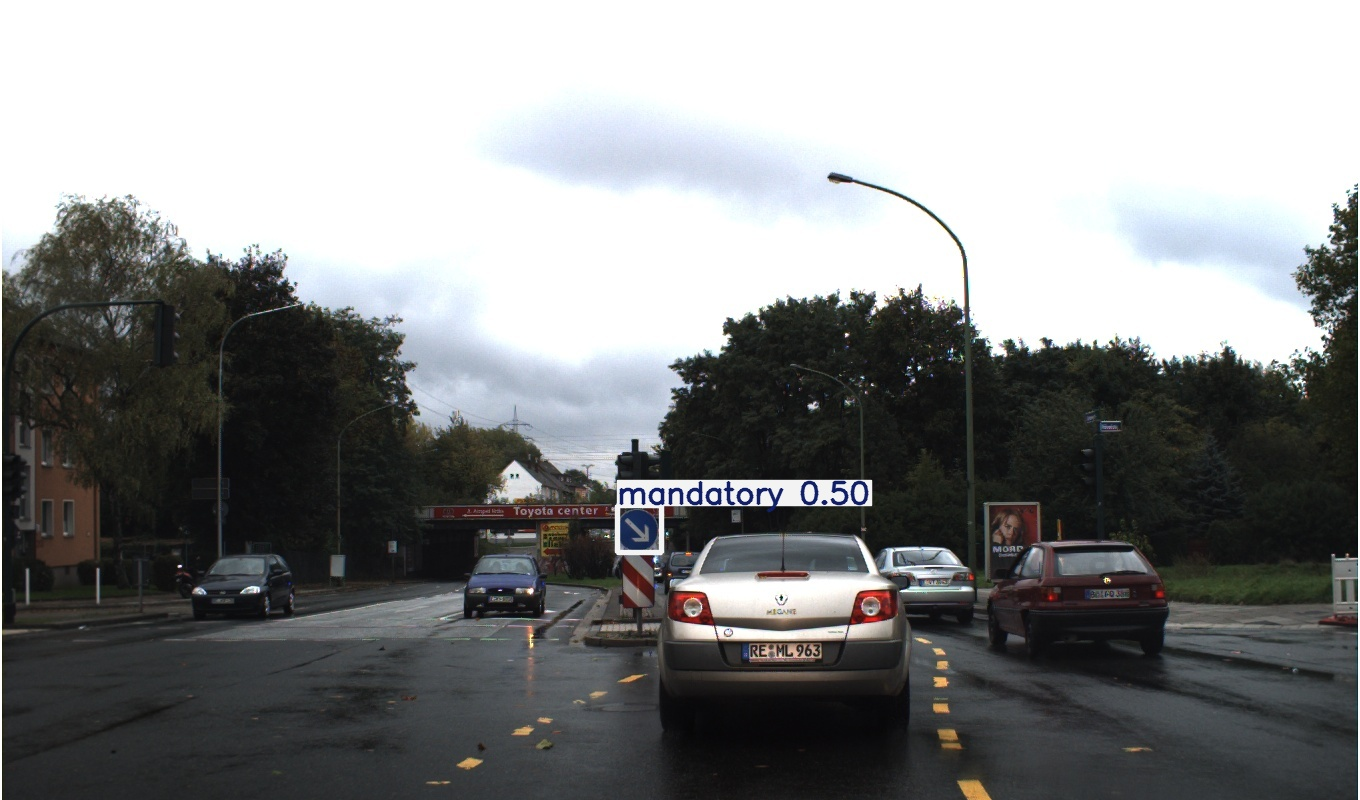

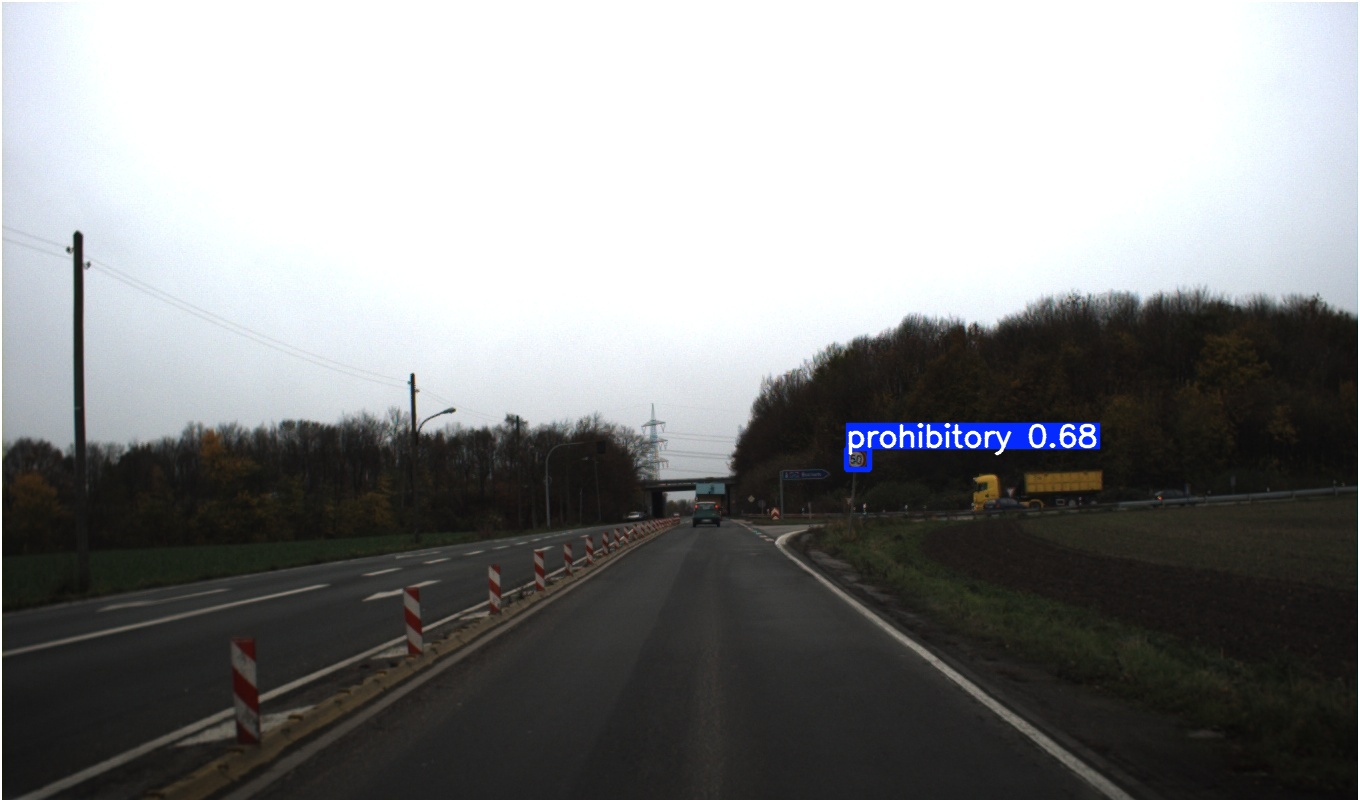

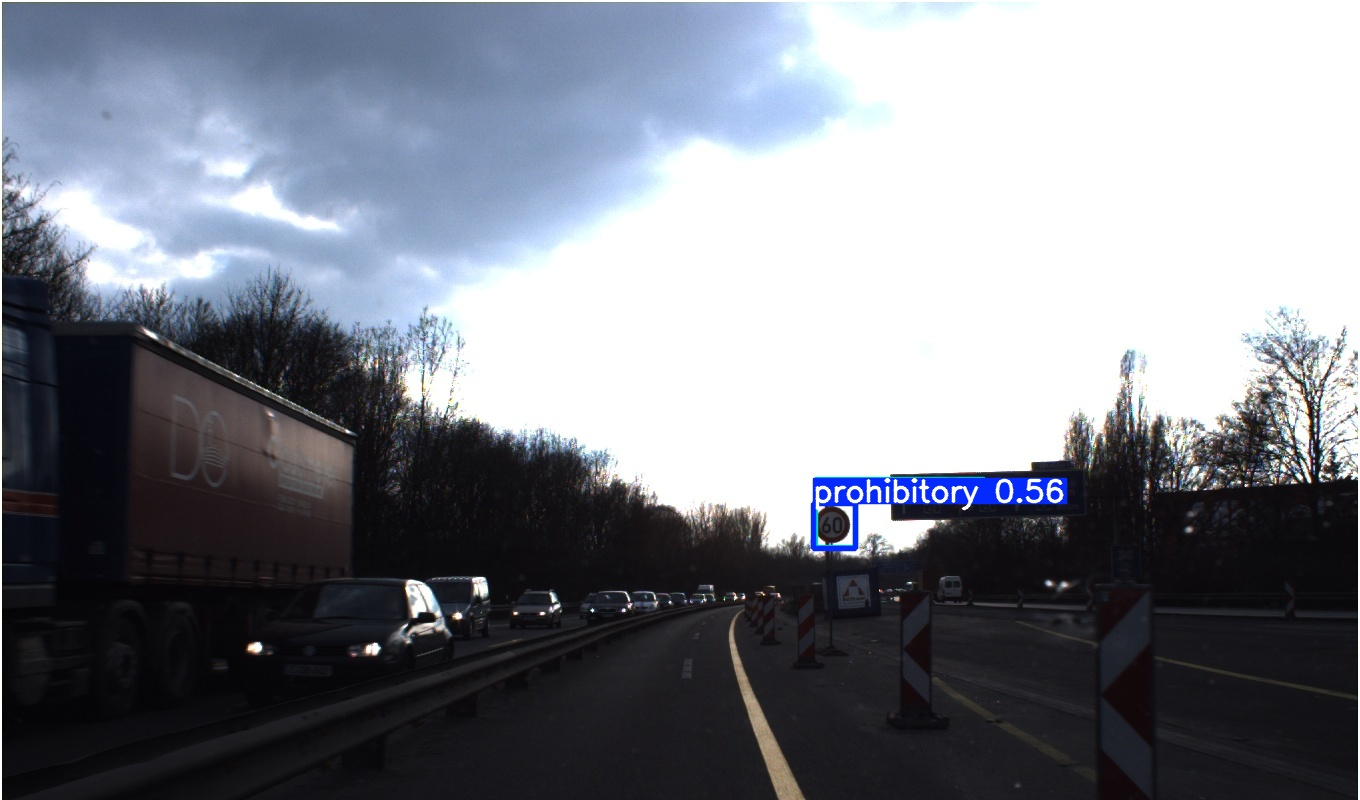

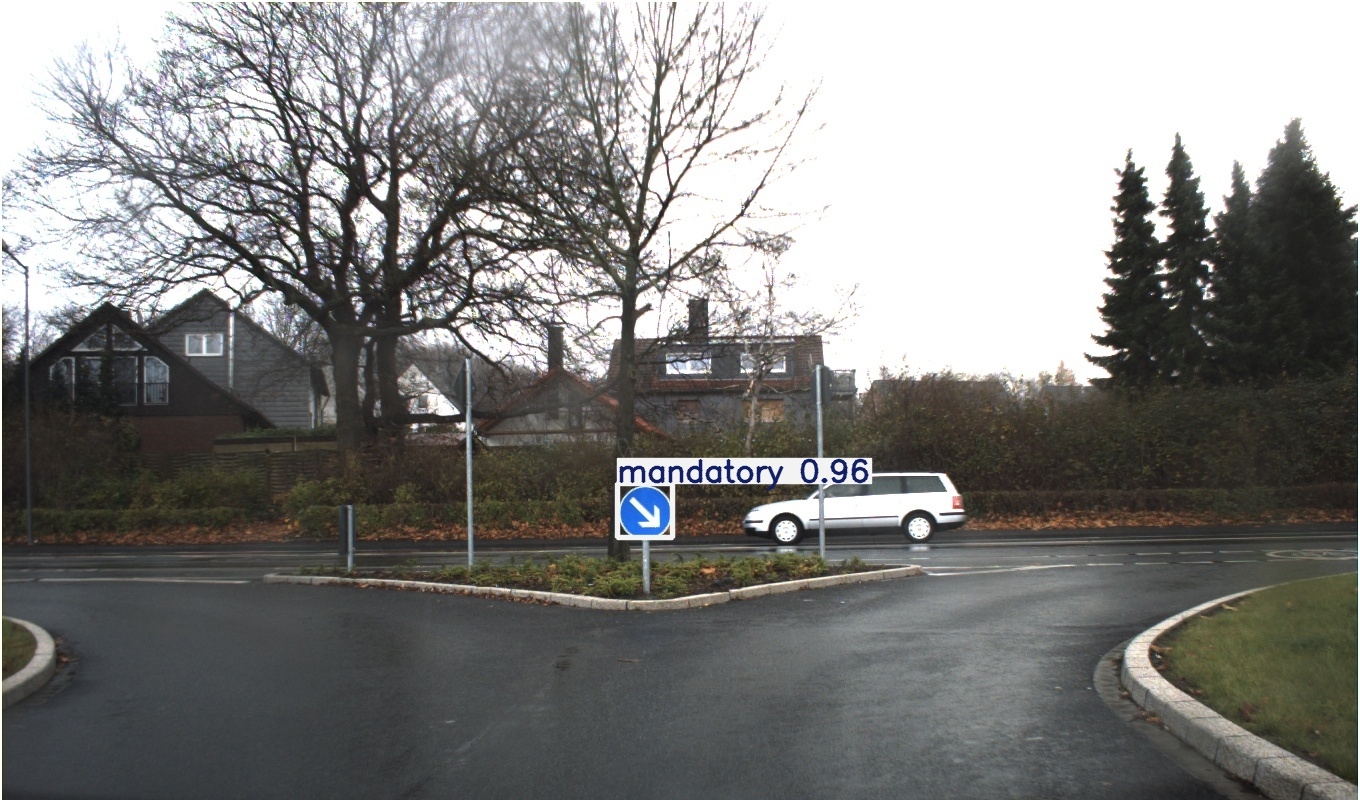

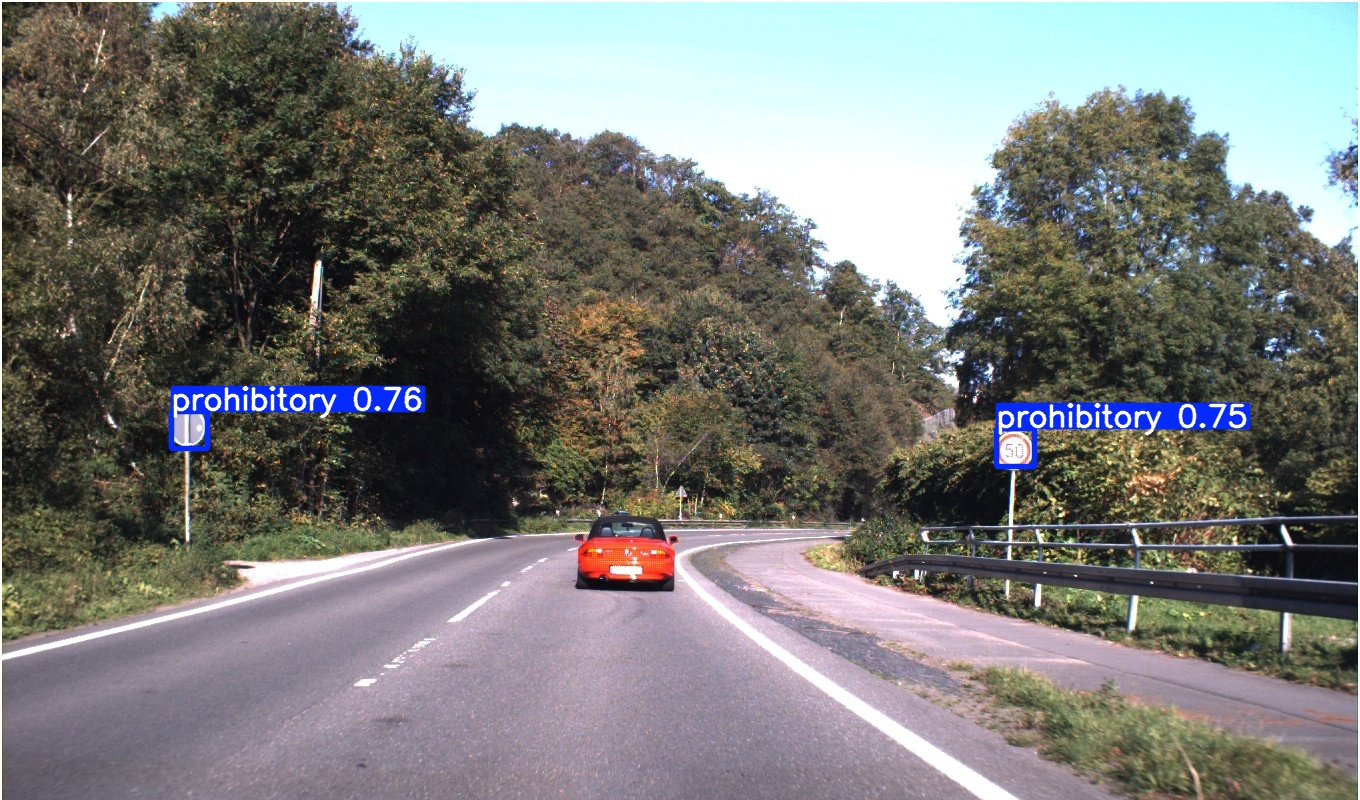

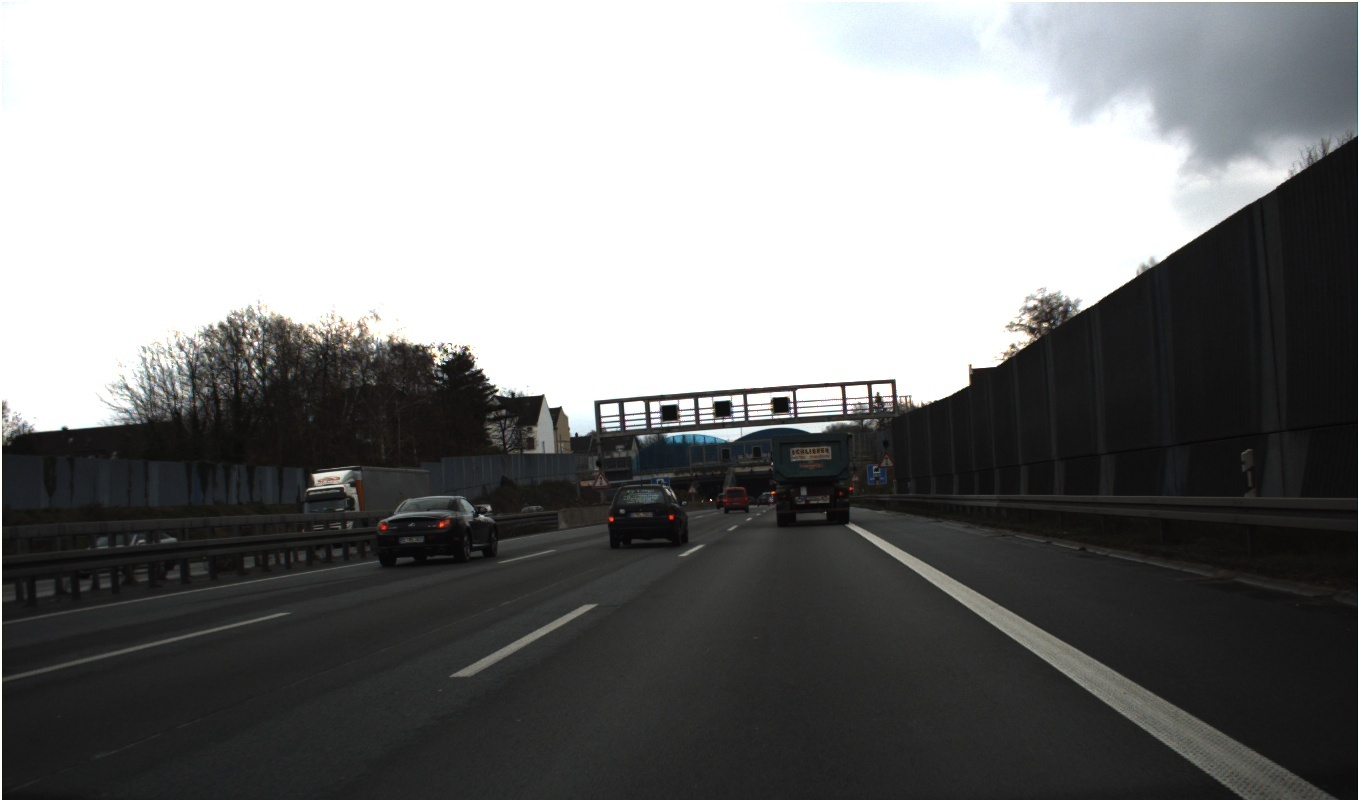

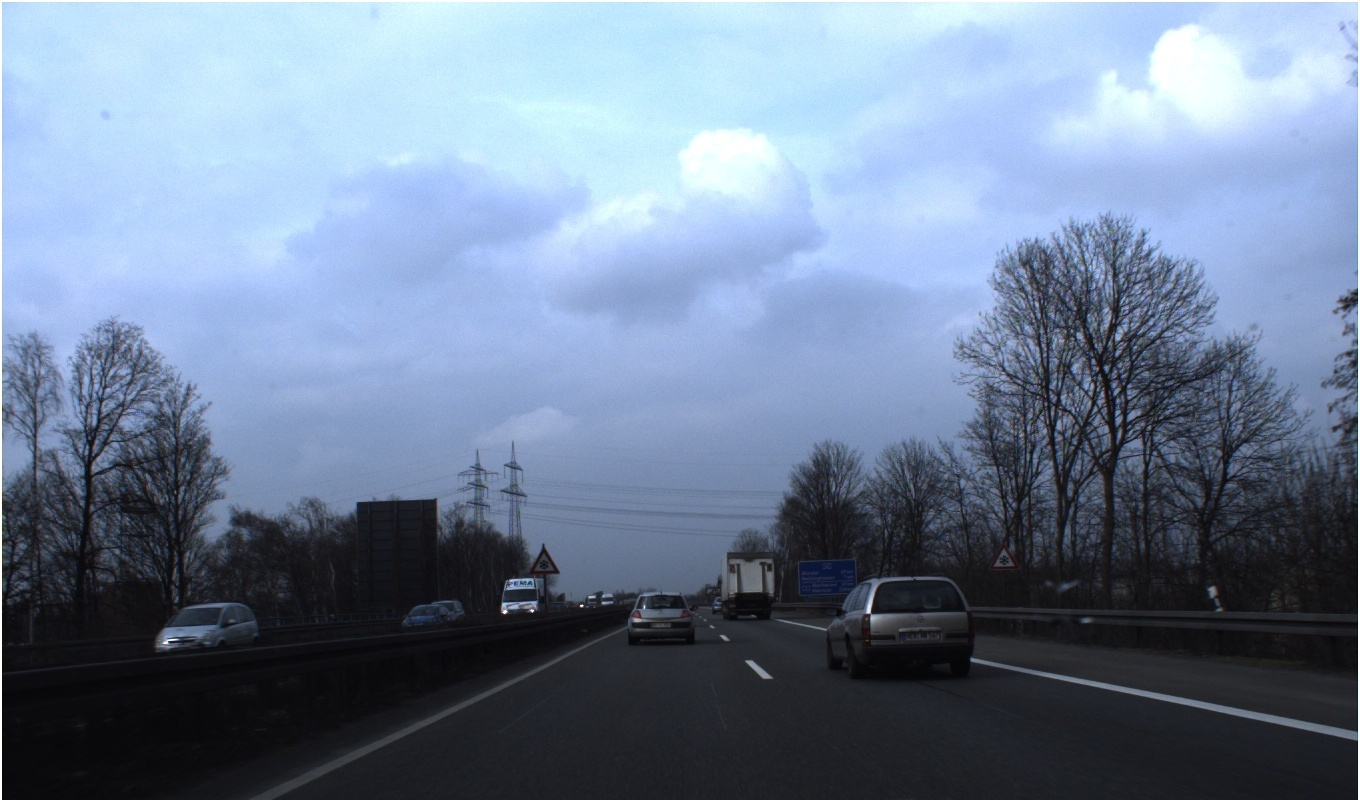

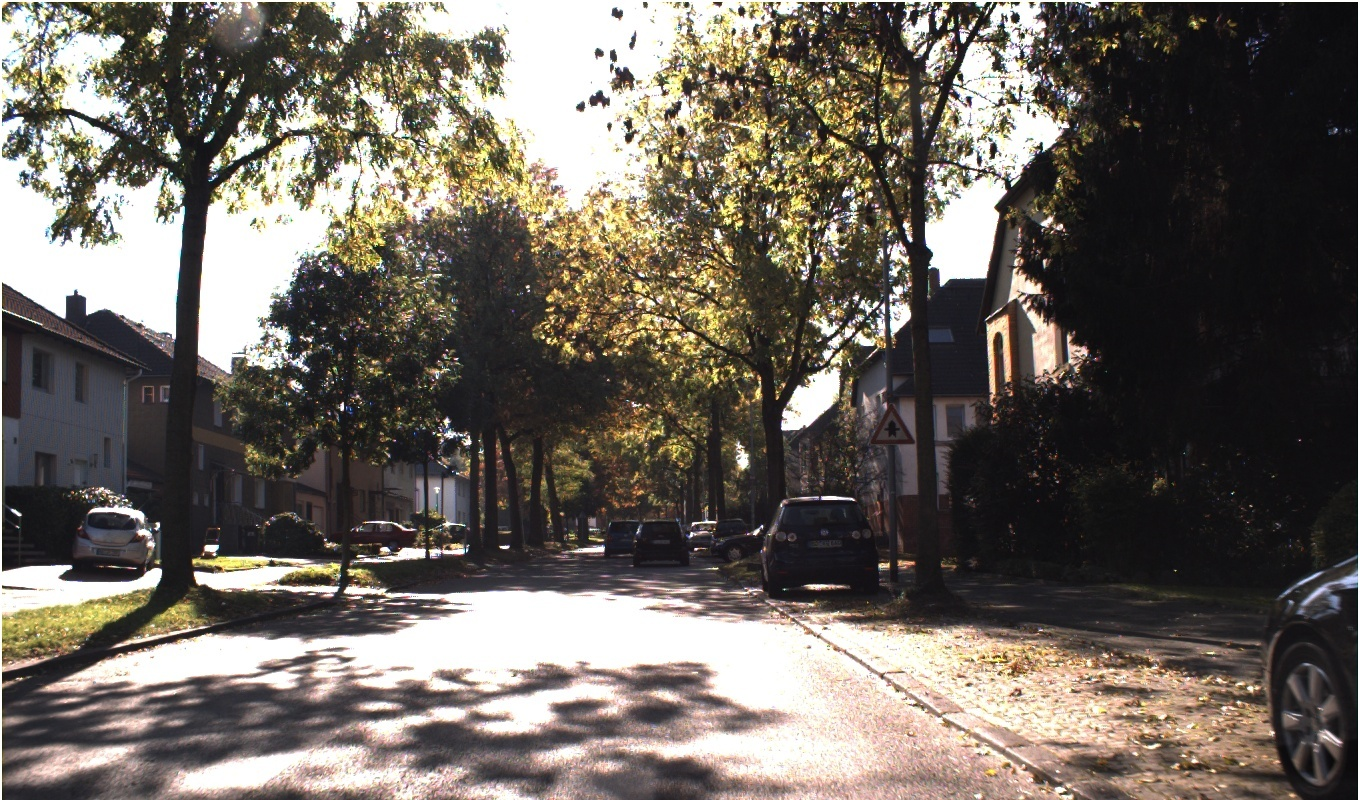

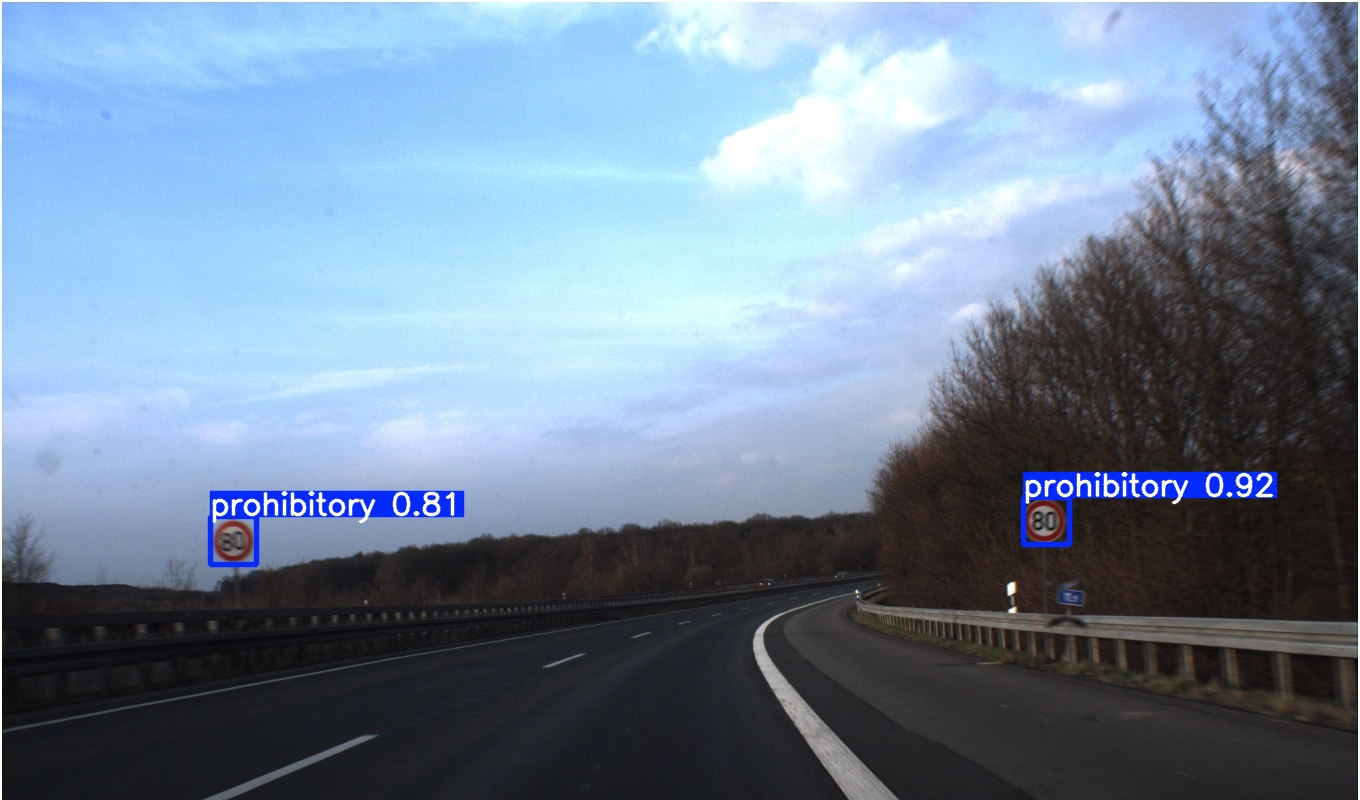

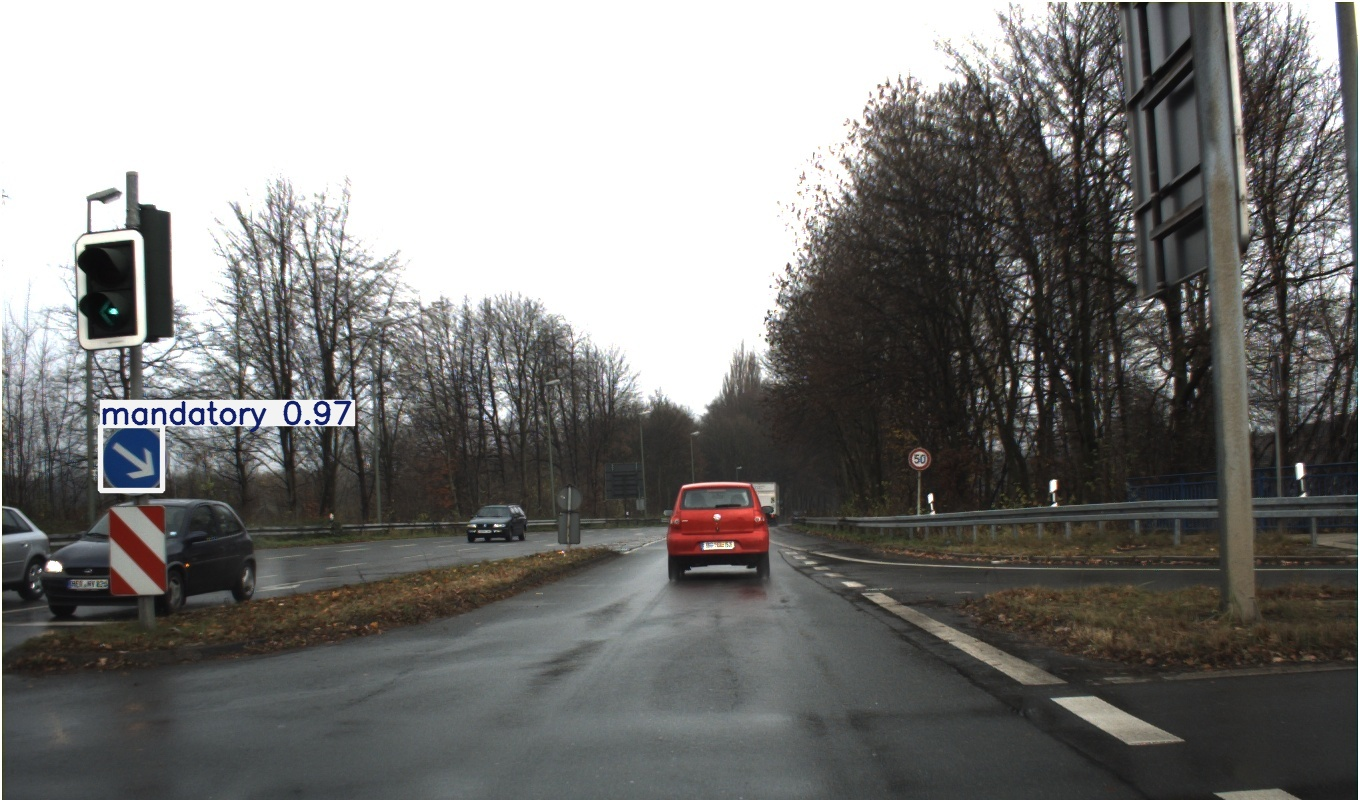

In [10]:
import glob
from IPython.display import Image, display

image_paths = glob.glob('/content/yolov5/runs/detect/exp/*.jpg')[:10]  # Get 10 images

for image_path in image_paths:
    display(Image(filename=image_path, width=800))


In [13]:
!python val.py --weights runs/train/exp/weights/best.pt \
               --data /content/train_sign_obj_det_Updated_dataset_st/data.yaml \
               --img 320 --conf-thres 0.4 --save-txt --save-json



val: data=/content/train_sign_obj_det_Updated_dataset_st/data.yaml, weights=['runs/train/exp/weights/best.pt'], batch_size=32, imgsz=320, conf_thres=0.4, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=True, save_hybrid=False, save_conf=False, save_json=True, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
WARNING ⚠️ confidence threshold 0.4 > 0.001 produces invalid results
YOLOv5 🚀 v7.0-399-g8cc44963 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
Model summary: 157 layers, 7020913 parameters, 0 gradients, 15.8 GFLOPs
val: Scanning /content/train_sign_obj_det_Updated_dataset_st/imagesT/val_Im.cache... 148 images, 0 backgrounds, 0 corrupt: 100% 148/148 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 5/5 [00:02<00:00,  1.77it/s]
                   all        148        242      0.871      0.593      0.757    

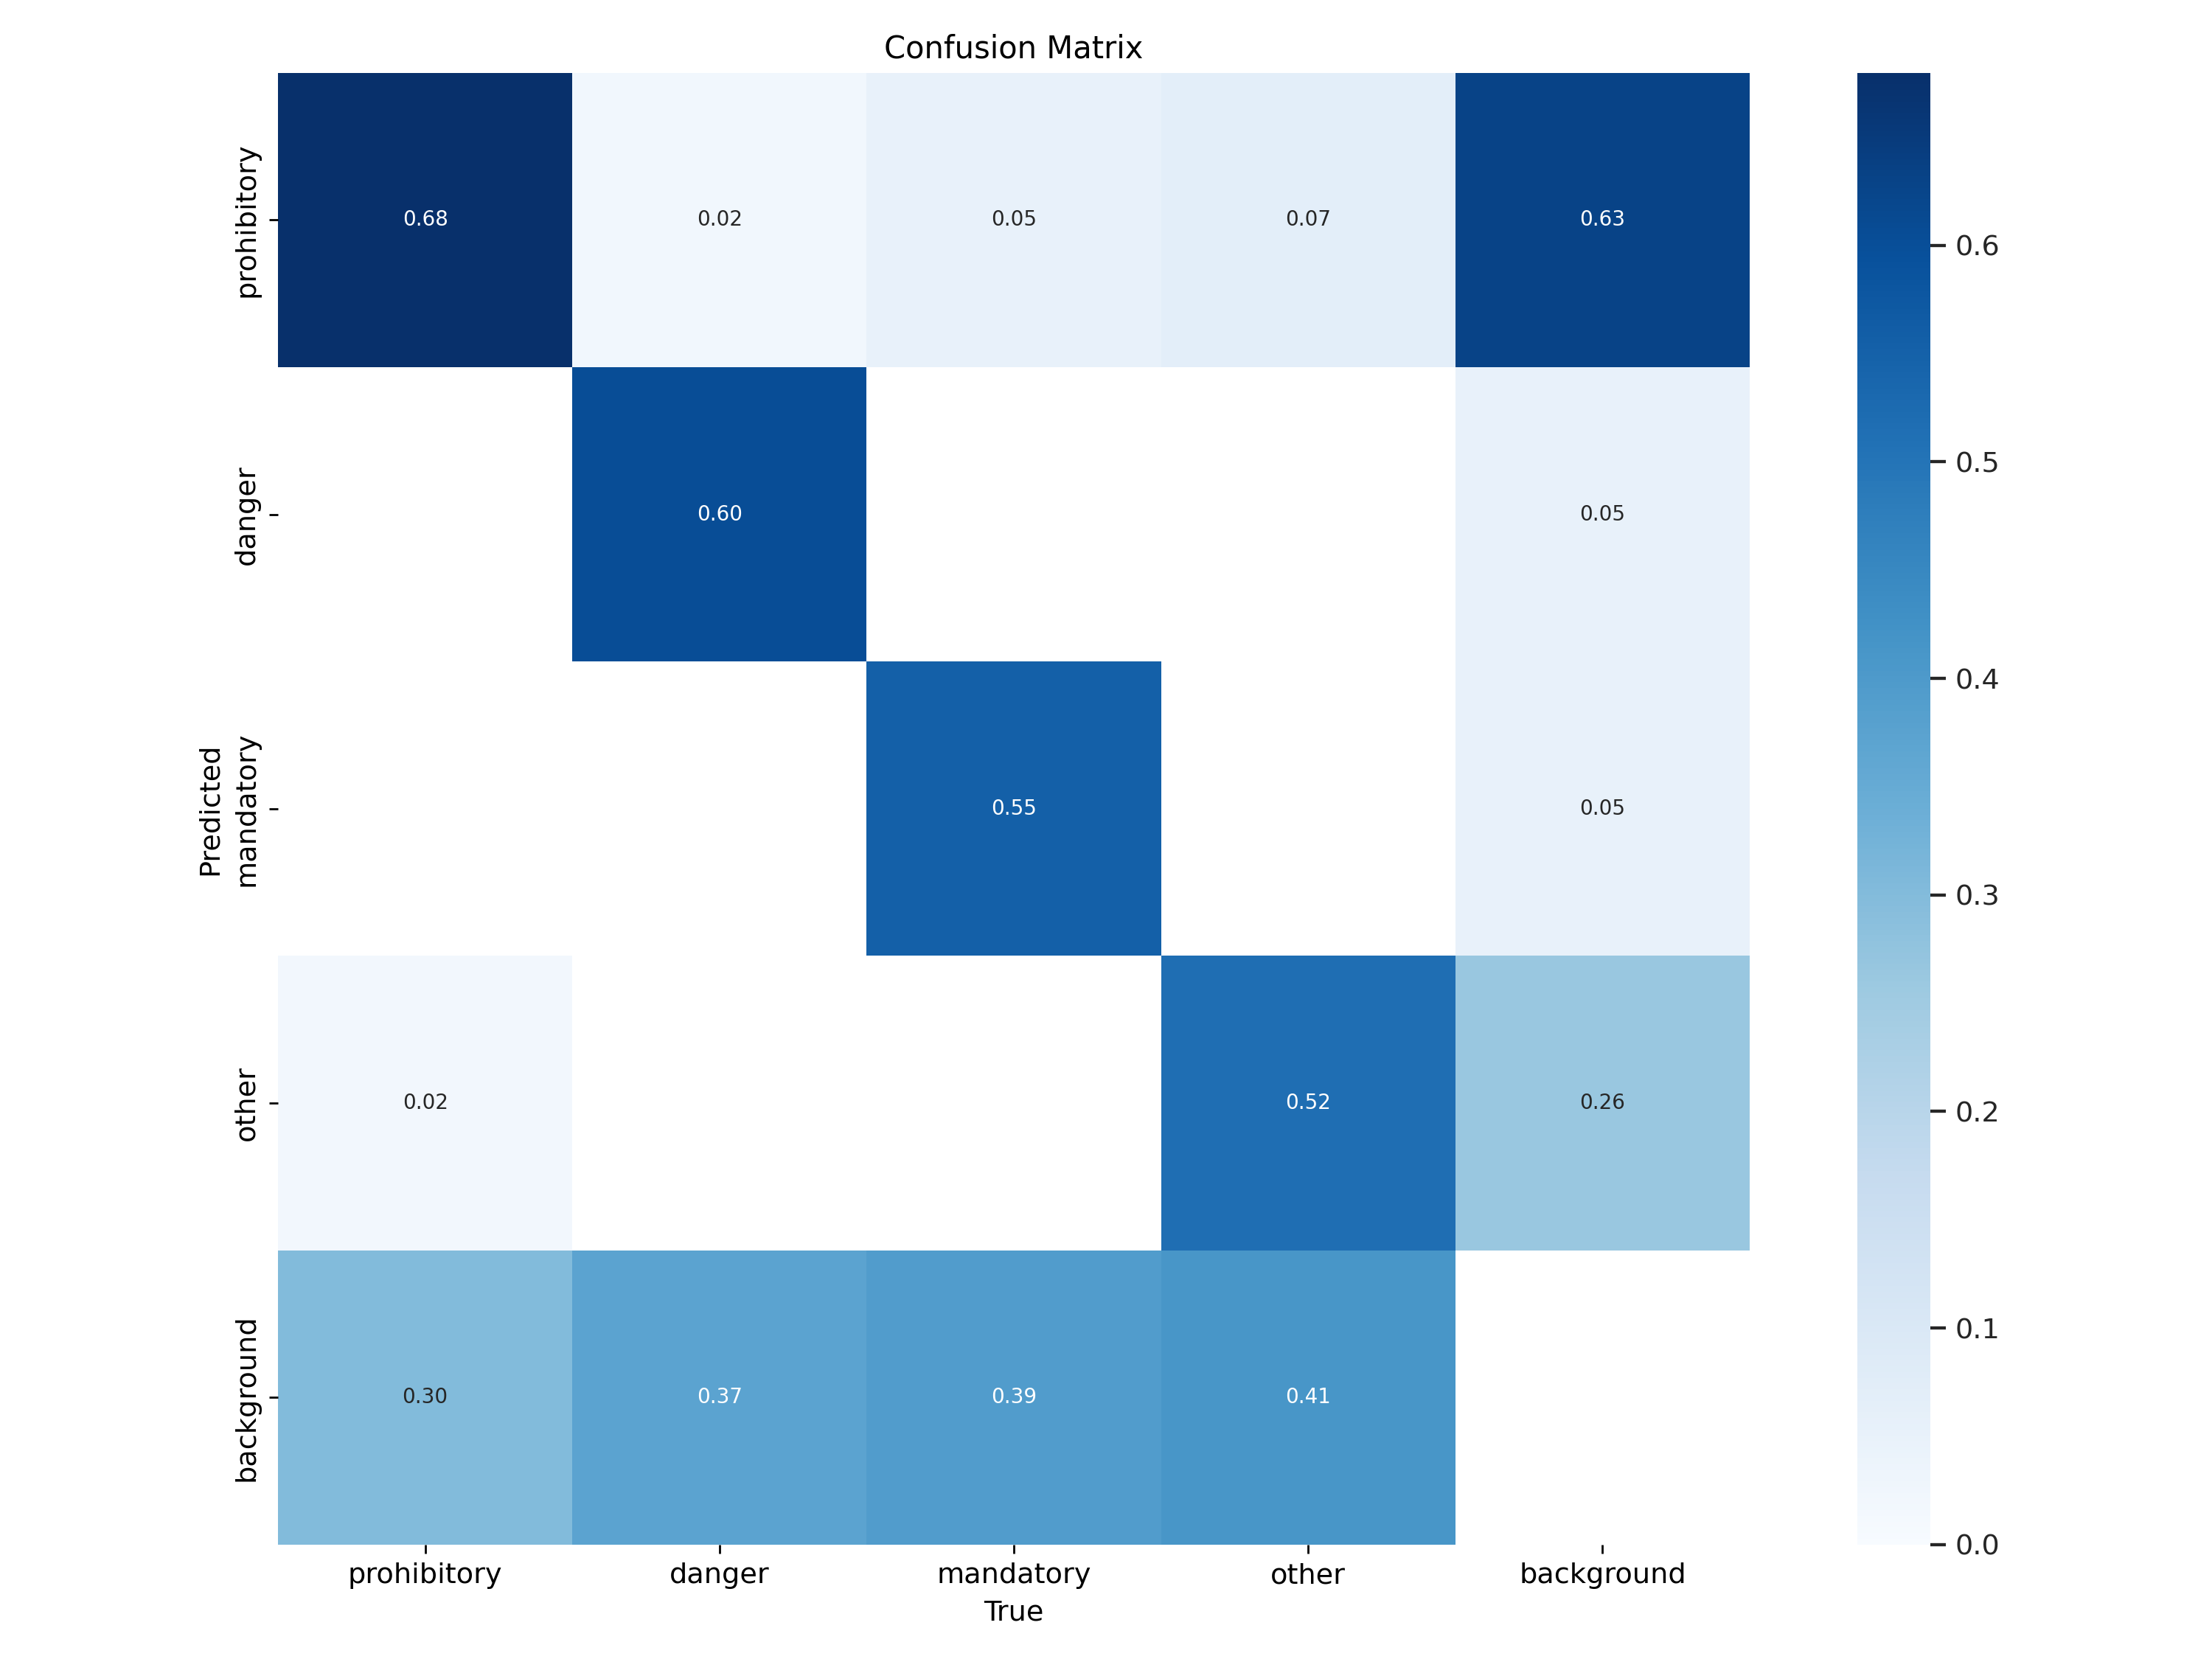

In [14]:
from IPython.display import Image
Image(filename='runs/val/exp/confusion_matrix.png', width=800)



In [15]:
!python val.py --weights runs/train/exp/weights/best.pt \
               --data /content/train_sign_obj_det_Updated_dataset_st/data.yaml \
               --img 320 --conf 0.4 --save-json --save-txt --verbose


val: data=/content/train_sign_obj_det_Updated_dataset_st/data.yaml, weights=['runs/train/exp/weights/best.pt'], batch_size=32, imgsz=320, conf_thres=0.4, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=True, save_txt=True, save_hybrid=False, save_conf=False, save_json=True, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
WARNING ⚠️ confidence threshold 0.4 > 0.001 produces invalid results
YOLOv5 🚀 v7.0-399-g8cc44963 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
Model summary: 157 layers, 7020913 parameters, 0 gradients, 15.8 GFLOPs
val: Scanning /content/train_sign_obj_det_Updated_dataset_st/imagesT/val_Im.cache... 148 images, 0 backgrounds, 0 corrupt: 100% 148/148 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 5/5 [00:02<00:00,  1.81it/s]
                   all        148        242      0.871      0.593      0.757     